Saving Housing.csv to Housing (5).csv
Mean Squared Error (MSE): 1754318687330.67
Root Mean Squared Error (RMSE): 1324506.96
R² Score: 0.65
Mean Absolute Error (MAE): 970043.40


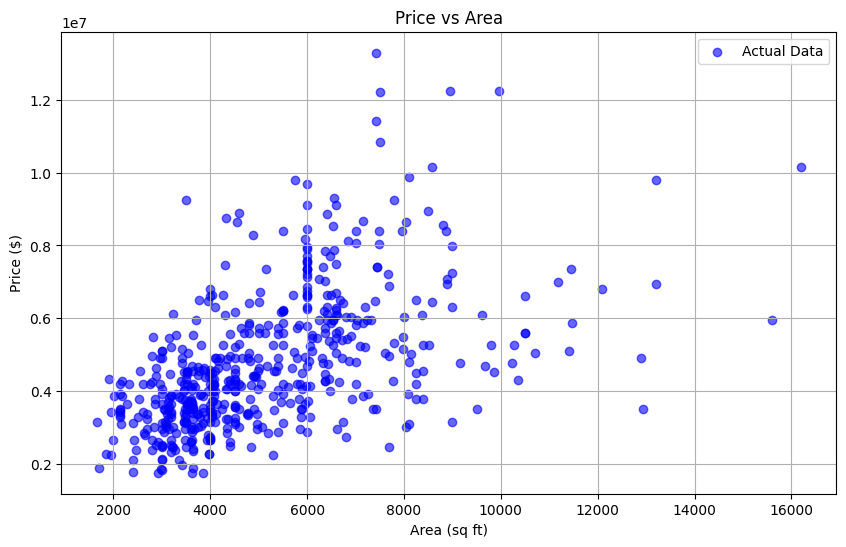

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files

uploaded = files.upload()
data = pd.read_csv('Housing.csv')

x = data.drop(['price'], axis=1)
y = data['price']

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),('cat', categorical_transformer, categorical_cols)])

model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['price'], color='blue', alpha=0.6, label='Actual Data')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Price vs Area')
plt.grid(True)
plt.legend()
plt.show()
